<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg">
<center>
<p>
<h1>Algorítmica Avanzada</h1>
<h2>Problemas 1.C - Grafos </h2>
</center>
</p>
</div>


<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>0 - Detección de ciclos</p></h2>
  
  <p>
  En este ejercicio deberéis implementar un algoritmo capaz de detectar si un grafo cualquiera contiene ciclos.
  </p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Este es el grafo que utilizaremos para buscar ciclos.</li>
</ul>
<br>
<h3>OUTPUT</h3>
<ul>
<li>__ _'TF'_ __: Booleano indicando si el grafo de entrada contiene algún ciclo.</li>
<ul>

</p>

</div>

In [6]:
import networkx as nx

def cycles(G):
    
    discovered= set()
    S=list()
    S.append(0)
    
    G.node[0]['parents']=[]
    
    while len(S)!=0:
        actual_node=S.pop()
        
        if actual_node not in discovered:
            discovered.add(actual_node)
            for neighbor_node in list(G.adj[actual_node]):
                if neighbor_node in G.node[actual_node]['parents'] and neighbor_node!=G.node[actual_node]['parents'][len(G.node[actual_node]['parents'])-1]:
                    return True
                
                S.append(neighbor_node)                
                if [x for x in G.node[neighbor_node] if x=='parents']!=['parents']:
                    G.node[neighbor_node]['parents']=G.node[actual_node]['parents'].copy()
                G.node[neighbor_node]['parents'].append(actual_node)
                
    return False

In [7]:
%matplotlib inline
from utils import draw
G = nx.generators.barabasi_albert_graph(100, 2)
cycles(G)

True

<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>1 - Circuito Euleriano</p></h2>
  <p>
  Se define como circuito euleriano aquel que pasa por todas las aristas de un grafo una única vez y que acaba en el mismo lugar en el que empieza. El problema de los caminos eulerianos fué la base de toda la teoría de grafos y fué postulado por Lehonard Euler en el famoso problema de __los siete puentes de Königsberg__. En este problema Euler se preguntaba si podía acabar en el mismo sitio tras cruzar todos los puentes una sola vez.
  </p>
  <img src="img/konigsberg.jpg"></img>
  <p>
  En este ejercicio se os propone implementar un algoritmo que, dado un grafo _G_ encuentre un camino euleriano.
  </p>

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Objeto de tipo grafo sobre el cual queremos encontrar el circuito Euleriano.</li>
</ul>
<br>
<h3>OUTPUT</h3>
<ul>
<li>__ _nodelist_ __: Una lista de nodos ordenados que formarían el circuito.</li>
<ul>

</p>

</div>

In [70]:
def cycle(G, v, discovered, path, i):
    S_v=list()
    S_v.append(v)
    
    count=0
    
    while len(S_v)!=0:
        actual_node=S_v.pop()
        path.insert(i+count, actual_node)
        count+=1
        
        #Check that the vertex have even degree,
        #because that all of them have it it's a
        #necessary and sufucient condition to ensure
        #that the graph has an Eureler cycle
        if G.degree[actual_node]%2==1:
            return 1
        
        if actual_node not in discovered or actual_node==v:
            discovered.add(actual_node)
            
            for neighbor_node in list(G.adj[actual_node]):
                if neighbor_node == v:
                    if v!=G.node[actual_node]['parent']:
                        return 0
                    
                if neighbor_node not in discovered:
                    S_v.append(neighbor_node)
                    G.node[neighbor_node]['parent']=actual_node
    
    return 2

def euler(G):
    discovered=set()
    path=[]
    
    ctrl=cycle(G,0,discovered, path, 0)
    if ctrl!=0:
        print(0)
        return 'Error: Not an Eulerian graph'
    
    while len(discovered)!=len(list(G.nodes)):
        for node in path:
            for new_node in list(G.adj[node]):
                if new_node not in discovered:
                    ctrl=cycle(G,node,discovered, path, path.index(node))
                    if ctrl!=0:
                        return 'Error: Not an Eulerian graph'
    
    return path
                    
                    
    
    

/home/m315/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


[0, 3, 2, 1, 0, 5, 4]

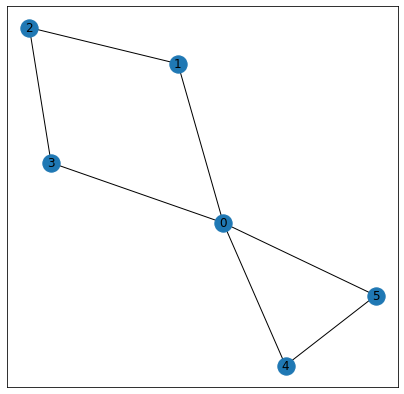

In [71]:
%matplotlib inline
from utils import draw
G=nx.Graph()
G.add_edges_from([(0,1),(1,2),(2,3),(0,3),(0,4),(4,5),(0,5)])
draw(G)
euler(G)

<div class="alert alert-warning">
<h1>Pregunta</h1>
<p><strong>
¿Qué condiciones se deben de cumplir para que un grafo cualquiera contenga un camino euleriano? Demuéstralo.
</strong></p>
</div>

$\textbf{Teorema: }$Un grafo no dirigido $G$ tiene un ciclo euleriano si y solo si todos los nodos son de grado par y los nodos con grado no nulo percenecen a la misma componente conexa.

$\textit{Demostracion:}$

$\Rightarrow ]$ Si $G$ es un grafo Euleriano, contiene un camino euleriano, entonces $\forall v\in V$ el numero de vertices adyacentes a $v$ es el doble de veces que pasa el camino por $v$, por tanto $d(v)$ es par.
    
$\Leftarrow ]$ Supongamos que todos los nodos de $G$ tiene grado par pero $G$ no es euleriano. De todos los subgrafos posibles elegimos $H$ el que tenga menor numero de vertices y cumpla que es conexo, todos sus nodos son de grado par y no es euleriano, que existe dado que $G$ lo es y existen un numero finito de subgrafos. $H$ contiene un ciclo, y por lo tanto un camino cerrado. De todos los caminos cerrados de $H$ elegimos el que mas aristas tenga $C$.

Sea $H'$ un componente conexa de $H\setminus{E(C)}$ ($H$ sin las aristas de $C$), tal que $H'$ tenga almenos una arista. Ahora notamos que todo nodo $v$ de $H'$ tiene grado $d_{H'}(v)=d_{H}(v)-d_{C}(v)$ que es par, por lo tanto $H'$ debe ser un grafo euleriano. Y notamos que $C$ y $H'$ comparten almenos un vertice.

Finalmente, si juntamos $C$ y $H'$ obtenemos un camino cerrado en $H$, con mas aristas que el camino $C$, lo qual es una contradiccion porque $C$ era el camino cerrado de $H$ con mas aristas. Por lo tanto, $G$ es un grafo euleriano.
$\qed$

$\textbf{Corolario: }$Un grafo no dirigido $G$ tiene un camino euleriano si y solo si tiene exactamentes dos nodos de grado impar, i los nodos con grado no nulo percenecen a la misma componente conexa. En este caso el camino euleriano empieza y acaba en esos dos vertices.

<div class="alert alert-warning">
<h1>Extra</h1>
<p><strong>
Además de circuitos Eulerianos, definimos caminos Eulerianos aquellos que recorren todas las aristas de un grafo sin repetirlas, pero no termina en el mismo nodo que empieza. Modifica el algoritmo anterior para que sea capaz de detectar si el grafo contiene un ciclo o un camino Euleriano, y devuelva la lista de nodos ordenados que componen dicho ciclo o camino. Tened en cuenta que son casos excluyentes.
</strong></p>
</div>

In [69]:
def cycle(G, v, discovered, path, i):
    S_v=list()
    S_v.append(v)
    
    count=0
    
    while len(S_v)!=0:
        actual_node=S_v.pop()
        path.insert(i+count, actual_node)
        count+=1
        
        if actual_node not in discovered or actual_node==v:
            discovered.add(actual_node)
            
            for neighbor_node in list(G.adj[actual_node]):
                if neighbor_node == v:
                    if v!=G.node[actual_node]['parent']:
                        return 0
                    
                if neighbor_node not in discovered:
                    S_v.append(neighbor_node)
                    G.node[neighbor_node]['parent']=actual_node
    
    return 2

def non_cycle_path(G, v, w, discovered, path, i):
    S_v=list()
    S_v.append(v)
    
    count=0
    
    while len(S_v)!=0:
        actual_node=S_v.pop()
        path.insert(i+count, actual_node)
        count+=1
        
        if actual_node not in discovered:
            discovered.add(actual_node)
            
            for neighbor_node in list(G.adj[actual_node]):
                if neighbor_node == w:
                    discovered.add(w)
                    path.append(w)
                    return 0
                    
                if neighbor_node not in discovered:
                    S_v.append(neighbor_node)
                    G.node[neighbor_node]['parent']=actual_node
    
    return 2

def euler_non_cyclic_path(G):
    discovered=set()
    path=[]
    
    odd_v=[]
    
    for x in list(G.nodes):
        if G.degree[x]%2==1:
            odd_v.append(x)
            
    if len(odd_v)!=2:
        return 'No Eulerian Graph'
        
    
    ctrl=non_cycle_path(G,odd_v[0],odd_v[1],discovered, path, 0)
    if ctrl!=0:
        return 'Error'
    
    while len(discovered)!=len(list(G.nodes)):
        for node in path:
            for new_node in list(G.adj[node]):
                if new_node not in discovered:
                    ctrl=cycle(G,node,discovered, path, path.index(node))
                    if ctrl!=0:
                        return 'Error: Not an Eulerian graph'
    
    return path

[0, 4, 5] 0 1 {0, 4, 5}
[0, 3, 2, 1, 0, 4, 5] 5 6 {0, 1, 2, 3, 4, 5}


/home/m315/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


[0, 3, 2, 1, 0, 4, 5, 7, 6, 5]

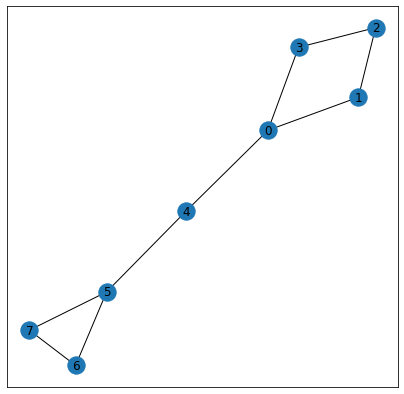

In [68]:
%matplotlib inline
from utils import draw
G=nx.Graph()
G.add_edges_from([(0,1),(1,2),(2,3),(0,3),(0,4),(4,5),(5,6),(6,7),(5,7)])
draw(G)
euler_non_cyclic_path(G)